# Spaceship Titanic

**Goal:** Predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

In [ ]:
%reset

## Data Preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
X = train_data.copy()
y = X.pop("Transported")

data = pd.concat([X, test_data], axis=0).reset_index(drop=True)
display(data)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
print(f"Train shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")
print(f"Combined data shape: {data.shape}")

In [ ]:
train_data

In [2]:
"""
Cell generated by Data Wrangler.
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def clean_data(train_data):
    train_data = train_data.drop(columns=['Name'])
    # Replace missing values with the most common value of each column in: 'HomePlanet'
    train_data = train_data.fillna({'HomePlanet': train_data['HomePlanet'].mode()[0]})
    # One-hot encode column: 'HomePlanet'
    insert_loc = train_data.columns.get_loc('HomePlanet')
    train_data = pd.concat([train_data.iloc[:,:insert_loc], pd.get_dummies(train_data.loc[:, ['HomePlanet']]), train_data.iloc[:,insert_loc+1:]], axis=1)
    # One-hot encode column: 'Destination'
    insert_loc = train_data.columns.get_loc('Destination')
    train_data = pd.concat([train_data.iloc[:,:insert_loc], pd.get_dummies(train_data.loc[:, ['Destination']]), train_data.iloc[:,insert_loc+1:]], axis=1)
    # Change column type to bool for column: 'CryoSleep'
    train_data = train_data.astype({'CryoSleep': 'bool'})
    # Split text using string '/' in column: 'Cabin'
    loc_0 = train_data.columns.get_loc('Cabin')
    train_data_split = train_data['Cabin'].str.split(pat='/', expand=True).add_prefix('Cabin_')
    train_data = pd.concat([train_data.iloc[:, :loc_0], train_data_split, train_data.iloc[:, loc_0:]], axis=1)
    train_data = train_data.drop(columns=['Cabin'])
    # Rename column 'Cabin_0' to 'Cabin_deck'
    train_data = train_data.rename(columns={'Cabin_0': 'Cabin_deck'})
    # Rename column 'Cabin_1' to 'Cabin_num'
    train_data = train_data.rename(columns={'Cabin_1': 'Cabin_num'})
    # Rename column 'Cabin_2' to 'Cabin_side'
    train_data = train_data.rename(columns={'Cabin_2': 'Cabin_side'})
    # Replace missing values with the most common value of each column in: 'Cabin_deck'
    train_data = train_data.fillna({'Cabin_deck': train_data['Cabin_deck'].mode()[0]})
    # Replace missing values with the most common value of each column in: 'Cabin_num'
    train_data = train_data.fillna({'Cabin_num': train_data['Cabin_num'].mode()[0]})
    # Replace missing values with the most common value of each column in: 'Cabin_side'
    train_data = train_data.fillna({'Cabin_side': train_data['Cabin_side'].mode()[0]})
    # One-hot encode column: 'Cabin_side'
    insert_loc = train_data.columns.get_loc('Cabin_side')
    train_data = pd.concat([train_data.iloc[:,:insert_loc], pd.get_dummies(train_data.loc[:, ['Cabin_side']]), train_data.iloc[:,insert_loc+1:]], axis=1)
    train_data.loc[(train_data["CryoSleep"] == True) & (train_data["RoomService"].isna()), "RoomService"] = 0
    train_data.loc[(train_data["CryoSleep"] == True) & (train_data["FoodCourt"].isna()), "FoodCourt"] = 0
    train_data.loc[(train_data["CryoSleep"] == True) & (train_data["ShoppingMall"].isna()), "ShoppingMall"] = 0
    train_data.loc[(train_data["CryoSleep"] == True) & (train_data["Spa"].isna()), "Spa"] = 0
    train_data.loc[(train_data["CryoSleep"] == True) & (train_data["VRDeck"].isna()), "VRDeck"] = 0
    train_data.loc[(train_data["CryoSleep"] == False) & (train_data["RoomService"].isna()), "RoomService"] = train_data.loc[train_data["CryoSleep"] == False, "RoomService"].median()
    train_data.loc[(train_data["CryoSleep"] == False) & (train_data["FoodCourt"].isna()), "FoodCourt"] = train_data.loc[train_data["CryoSleep"] == False, "FoodCourt"].median()
    train_data.loc[(train_data["CryoSleep"] == False) & (train_data["ShoppingMall"].isna()), "ShoppingMall"] = train_data.loc[train_data["CryoSleep"] == False, "ShoppingMall"].median()
    train_data.loc[(train_data["CryoSleep"] == False) & (train_data["Spa"].isna()), "Spa"] = train_data.loc[train_data["CryoSleep"] == False, "Spa"].median()
    train_data.loc[(train_data["CryoSleep"] == False) & (train_data["VRDeck"].isna()), "VRDeck"] = train_data.loc[train_data["CryoSleep"] == False, "VRDeck"].median()
    # Change column type to bool for column: 'VIP'
    train_data = train_data.astype({'VIP': 'bool'})
    # Replace missing values with the median of each column in: 'Age'
    train_data = train_data.fillna({'Age': train_data['Age'].median()})
    std_scaler = StandardScaler()
    train_data["Age"] = std_scaler.fit_transform(train_data[["Age"]])
    features_to_transform = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    for i in features_to_transform:
        train_data[i] = np.log1p(train_data[i])
    # Change column type to int64 for column: 'Cabin_num'
    train_data = train_data.astype({'Cabin_num': 'int64'})
    
    return train_data

train_data_clean = clean_data(train_data.copy())
test_data_clean = clean_data(test_data.copy())


In [3]:
def transform_features(data):
    data = data.copy()

    # Ensure numeric spending columns
    spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    for col in spend_cols:
        data[col] = pd.to_numeric(data[col], errors="coerce").fillna(0)

    # Ensure CryoSleep numeric
    data["CryoSleep_int"] = data["CryoSleep"].astype(int)

    # Spending features
    data["TotalSpend"] = data[spend_cols].sum(axis=1)
    data["LuxurySpend"] = data["Spa"] + data["VRDeck"]
    data["EssentialSpend"] = data["FoodCourt"] + data["ShoppingMall"] + data["RoomService"]
    data["LuxuryRatio"] = data["LuxurySpend"] / (data["TotalSpend"] + 1)

    # CryoSleep interactions
    data["CryoSleep_NoSpend"] = (
        (data["CryoSleep_int"] == 1) & (data["TotalSpend"] == 0)
    ).astype(int)

    data["CryoSleep_LuxurySpend"] = data["CryoSleep_int"] * data["LuxurySpend"]

    # Passenger group features
    data["PassengerGroup"] = data["PassengerId"].str.split("_").str[0].astype(int)
    data["GroupSize"] = data.groupby("PassengerGroup")["PassengerGroup"].transform("count")
    data["GroupCryoRate"] = data.groupby("PassengerGroup")["CryoSleep_int"].transform("mean")

    # Cabin features
    deck_map = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "T":8}
    data["CabinDeckLevel"] = data["Cabin_deck"].map(deck_map)

    data["CabinFront"] = (data["Cabin_num"] < data["Cabin_num"].median()).astype(int)

    data["DeckSide_S"] = data["CabinDeckLevel"] * data["Cabin_side_S"].astype(int)
    data["DeckSide_P"] = data["CabinDeckLevel"] * data["Cabin_side_P"].astype(int)

    # Destination interactions
    data["Luxury_TRAPPIST"] = (
        data["LuxurySpend"] * data["Destination_TRAPPIST-1e"].astype(int)
    )

    data["Luxury_PSO_J318"] = (
        data["LuxurySpend"] * data["Destination_PSO J318.5-22"].astype(int)
    )

    # Age features (scaled age)
    data["Age_is_young"] = (data["Age"] < -1).astype(int)
    data["Age_is_old"] = (data["Age"] > 1).astype(int)
    data["Age_abs"] = data["Age"].abs()
    data["Age_CryoSleep"] = data["Age"] * data["CryoSleep_int"]
    data["Age_TotalSpend"] = data["Age"] * data["TotalSpend"]
    data["Age_LuxurySpend"] = data["Age"] * data["LuxurySpend"]

    data["Age_quantile"] = pd.qcut(
        data["Age"], q=5, labels=False, duplicates="drop"
    )
    data.set_index(data["PassengerId"])

    # Drop unused columns
    drop_cols = ["Cabin_num", "Cabin_deck"]
    data.drop(columns=drop_cols, inplace=True)

    return data


In [4]:
train_data_transformed = transform_features(train_data_clean.copy())
test_data_transformed = transform_features(test_data_clean.copy())

In [ ]:
train_data_transformed

In [16]:
def create_output(preds):
    output = pd.DataFrame({'PassengerId':test_data_transformed.PassengerId,'Transported': preds})

    output.to_csv('submissions/submission_7.csv', index=False) 
    return output 

In [6]:
from sklearn.model_selection import train_test_split
X = train_data_transformed.copy()
y = X.pop("Transported")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering

In [ ]:
data_clean = clean_data(data.copy())
data_clean.head()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_train_preds)
).plot(ax=ax[0], colorbar=False)
ax[0].set_title("Train Confusion Matrix")

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_test_preds)
).plot(ax=ax[1], colorbar=False)
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()


In [6]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X,y)
dummy_clf.score(X,y)

0.5036236051995858

In [ ]:
train_preds = dummy_clf.predict(X)
test_preds = dummy_clf.predict(test_data_transformed)

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X,y)
rf_clf.score(X,y)

0.9997699298285977

In [ ]:
test_preds = rf_clf.predict(test_data_clean)

Text(0.5, 1.0, 'Overftting / Underfitting Check')

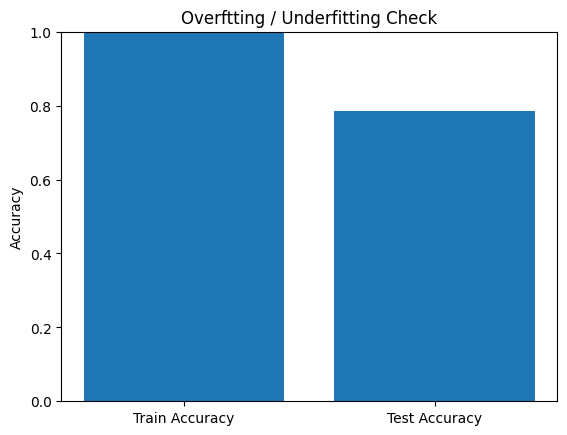

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import accuracy_score
rf_clf.fit(X_train, y_train)

y_train_preds = rf_clf.predict(X_train)
y_test_preds = rf_clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_preds)
test_acc = accuracy_score(y_test, y_test_preds)

plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Overftting / Underfitting Check")

In [16]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'bootstrap': [True, False]
}
rscv = RandomizedSearchCV(rf_clf, param_grid, random_state=42)
search = rscv.fit(X,y)
print(search.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_best = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf= 2, max_depth = None, bootstrap = True)

rf_clf_best.fit(X, y)

rf_clf_best.score(X, y)
# from sklearn.model_selection import cross_val_score

# print(cross_val_score(rf_clf_best, X, y, cv=3))

0.9629587024042333

Text(0.5, 1.0, 'Overftting / Underfitting Check')

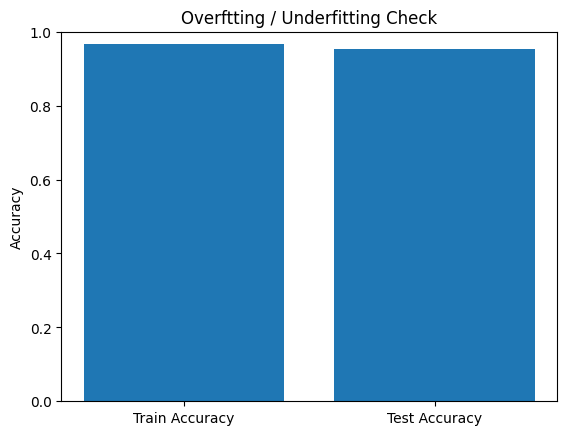

In [9]:
from sklearn.metrics import accuracy_score
y_train_preds = rf_clf_best.predict(X_train)
y_test_preds = rf_clf_best.predict(X_test)

train_acc = accuracy_score(y_train, y_train_preds)
test_acc = accuracy_score(y_test, y_test_preds)

plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Overftting / Underfitting Check")


In [14]:
from sklearn.metrics import classification_report
pred = rf_clf_best.predict(test_data_transformed)
rf_clf_best.score(test_data_transformed,pred)

1.0

In [17]:
create_output(pred)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
X = train_data_clean.copy()
y = X.pop("Transported")

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)
mutual_info = pd.Series(mutual_info, index=X.columns)
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["MI_score"]).style.background_gradient("cool")

In [10]:
def compute_mi(X,y,random_state=42):
    # Detect discrete features automatically
    discrete_features = [X[col].dtype in ["int64", "bool"]
    for col in X.columns]

    mi = mutual_info_classif(X,y,discrete_features=discrete_features,random_state=random_state)
    mi_df = pd.DataFrame({"feature": X.columns, "mi_score":mi}).sort_values("mi_score", ascending=False)

    return mi_df

def drop_low_mi_features(X, mi_df, threshold=0.01):
    keep_features = mi_df.loc[mi_df["mi_score"] >= threshold, "feature"]
    return X[keep_features].copy()

       


In [11]:
from sklearn.feature_selection import mutual_info_classif
X = train_data_transformed.copy()
y = X.pop("Transported")
mi_df = compute_mi(X,y)
X_new = drop_low_mi_features(X, mi_df, threshold=0.01)

In [12]:
X_new

,PassengerGroup,Age_TotalSpend,TotalSpend,EssentialSpend,CryoSleep_NoSpend,LuxuryRatio,LuxurySpend,CryoSleep,CryoSleep_int,Age_CryoSleep,...,FoodCourt,ShoppingMall,CabinDeckLevel,DeckSide_S,HomePlanet_Europa,Age_abs,HomePlanet_Earth,DeckSide_P,Age,Luxury_PSO_J318
0,1,0.000000,0.000000,0.000000,0,0.000000,0.000000,False,0,0.000000,...,0.000000,0.000000,2,0,True,0.711945,False,2,0.711945,0.0
1,2,-6.806930,20.377743,10.261162,0,0.473230,10.116581,False,0,-0.000000,...,2.302585,3.258097,6,6,False,0.334037,True,0,-0.334037,0.0
2,3,50.291507,24.690740,11.966469,0,0.495286,12.724271,False,0,0.000000,...,8.182280,0.000000,1,1,True,2.036857,False,0,2.036857,0.0
3,3,7.765987,26.455215,13.076629,0,0.487288,13.378586,False,0,0.000000,...,7.157735,5.918894,1,1,True,0.293552,False,0,0.293552,0.0
4,4,-20.014832,22.440794,15.003588,0,0.317276,7.437206,False,0,-0.000000,...,4.262680,5.023881,6,6,False,0.891895,True,0,-0.891895,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,17.496462,20.549990,8.827615,0,0.543962,11.722376,False,0,0.000000,...,8.827615,0.000000,1,0,True,0.851410,False,1,0.851410,0.0
8689,9278,-0.000000,0.000000,0.000000,1,0.000000,0.000000,True,1,-0.752431,...,0.000000,0.000000,7,7,False,0.752431,True,0,-0.752431,0.0
8690,9279,-1.601034,8.228444,7.535297,0,0.075110,0.693147,False,0,-0.000000,...,0.000000,7.535297,7,7,False,0.194573,True,0,-0.194573,0.0
8691,9280,4.679615,20.907936,6.956545,0,0.636819,13.951390,False,0,0.000000,...,6.956545,0.000000,5,5,True,0.223820,False,0,0.223820,0.0


In [ ]:
X_new.columns

In [ ]:
mi_df

In [13]:
def plot_corr_heatmap(data, figsize=(12,10)):
    corr = data.corr(numeric_only=True)

    plt.figure(figsize=figsize)
    sns.heatmap(corr,cmap="coolwarm",center=0,square=True,linewidths=0.5,cbar_kws={"shrink":0.8})
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()

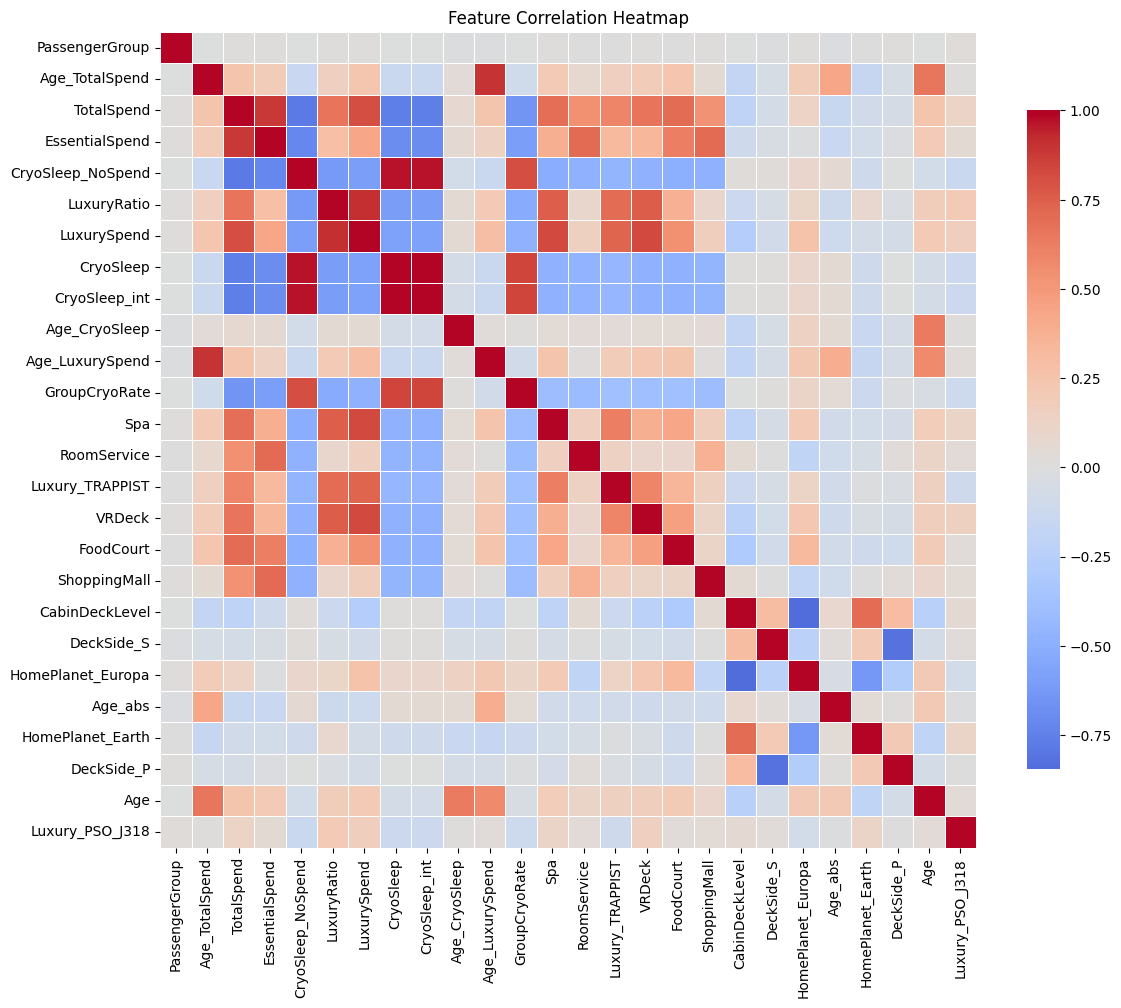

In [14]:
plot_corr_heatmap(X_new)

In [ ]:
rf_clf_best.fit(X_train,y_train)
rf_clf_best.score(X_train,y_train)

In [ ]:
y_train_preds = rf_clf_best.predict(X_train)
y_test_preds = rf_clf_best.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_preds)
test_acc = accuracy_score(y_test, y_test_preds)

plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Overftting / Underfitting Check")

plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'bootstrap': [True, False]
}
rscv = RandomizedSearchCV(rf_clf, param_grid)
search = rscv.fit(X_train,y_train)
print(search.best_params_)

In [ ]:
rf_clf_best = RandomForestClassifier(n_estimators=100, min_samples_split= 5,min_samples_leaf= 2, max_depth= 10, bootstrap= True)

rf_clf_best.fit(X_train,y_train)
rf_clf_best.score(X_train,y_train)

In [ ]:
y_train_preds = rf_clf_best.predict(X_train)
y_test_preds = rf_clf_best.predict(X_test)

train_acc = accuracy_score(y_train, y_train_preds)
test_acc = accuracy_score(y_test, y_test_preds)

plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Overftting / Underfitting Check")

plt.show()

In [ ]:
print(test_acc)

In [ ]:
test_data_clean = transform_features(test_data_clean.copy())
test_data_transformed = test_data_clean[X_reduced.columns]

In [ ]:
test_data_transformed

In [ ]:
rf_clf_best.fit(X_reduced,y)
test_preds = rf_clf_best.predict(test_data_transformed)

In [ ]:
def get_rf_feature_importance(X,y,rf):
    rf.fit(X,y)
    importances = rf.feature_importances_

    importance_df = (
        pd.DataFrame({
            "feature": X.columns,
            "importance": importances
        })
        .sort_values("importance", ascending=False)
        .reset_index(drop=True)
    
    )

    return rf, importance_df

In [ ]:
rf_model, importance_df = get_rf_feature_importance(X_reduced,y, rf_clf_best)

print(importance_df)


In [ ]:
import matplotlib.pyplot as plt

def plot_rf_importance(importance_df, top_n=20, figsize=(10, 6)):
    df_plot = importance_df.head(top_n)

    plt.figure(figsize=figsize)
    plt.barh(df_plot["feature"], df_plot["importance"])
    plt.gca().invert_yaxis()
    plt.title("Random Forest Feature Importance")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


In [ ]:
plot_rf_importance(importance_df, top_n=20)


In [ ]:
from sklearn.inspection import permutation_importance

def get_permutation_importance(model, X, y, n_repeats=10, random_state=42):
    result = permutation_importance(
        model,
        X,
        y,
        n_repeats=n_repeats,
        random_state=random_state,
        n_jobs=-1
    )

    perm_df = (
        pd.DataFrame({
            "feature": X.columns,
            "importance": result.importances_mean
        })
        .sort_values("importance", ascending=False)
        .reset_index(drop=True)
    )

    return perm_df


In [ ]:
perm_importance_df = get_permutation_importance(
    rf_clf_best, X_reduced, y
)


In [ ]:
perm_importance_df